<a href="https://colab.research.google.com/github/ChongHyeonKim/ChongHyeonKim/blob/main/Data_Visualization_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####################################################
## Coding Homework - 1
## Jongwon Choi
## GSAIM, Chung-Ang University
## choijw@cau.ac.kr
####################################################

import numpy as np
import matplotlib.pyplot as plt

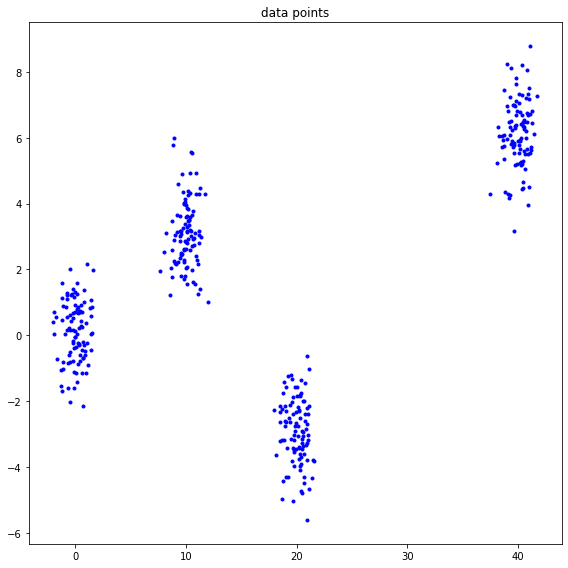

-2.0071878429722174
41.7387839263972
(400,)
mean intervalues of x = 10.936492942342353
intervalues of x = [8.929305099370136, 19.865798041712488, 30.80229098405484]


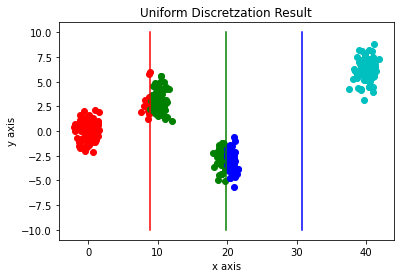

In [3]:
### Problem 1. Discretization
NUM_CLUSTER = 4
x, y = np.load('problem1.npy')
interval_values = list(range(NUM_CLUSTER-1))

### Problem 1-A. Implement the uniform discretization

####### BLANK #######

plt.figure(figsize=(8,8))
plt.plot(x, y,'.', color = 'blue')
plt.title('data points')
plt.tight_layout()
plt.show()

print(x.min())
print(x.max())
print(x.shape)

interval_values_new = (x.max() - x.min()) / NUM_CLUSTER
print("mean intervalues of x =", interval_values_new)
interval_values = [x.min()+interval_values_new,x.min()+interval_values_new*2, x.min()+interval_values_new*3 ]
#####################

print("intervalues of x =", interval_values)
labels = np.sum(np.reshape(x, [-1,1]) > np.reshape(interval_values, [1,-1]), axis=1)

### Plot...
plt.clf()
colors = ['r', 'g', 'b', 'c']
for i in range(4):
  plt.scatter(x[labels==i],y[labels==i], color=colors[i])
for i in range(3):  
  plt.plot([interval_values[i], interval_values[i]], [-10, 10], color=colors[i])
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Uniform Discretzation Result")
plt.show()

========kmean labels=====
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
======== kmeans cluster centers
[[ 3.99726346e+01  6.13234871e+00]
 [ 1.99672337e+01 -2.91656704e+00]
 [-1.88344888e-02  1.18603211e-01]
 [ 9.99250927e+00  3.1072

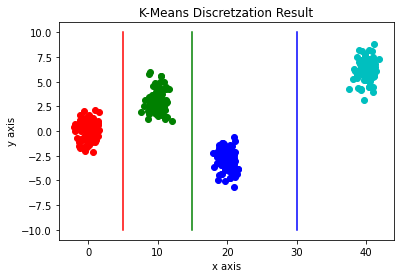

In [4]:
### Problem 1-B. Implement the K-Means clustering-based discretization
from sklearn.cluster import KMeans

####### BLANK #######

data = np.array([x,y])
data = np.transpose(data)
#kmeans = KMeans(n_clusters = 4, random_state=0).fit(data)
kmeans = KMeans(n_clusters = 4, init='k-means++').fit(data)
print("========kmean labels=====")
print(kmeans.labels_)
print("======== kmeans cluster centers")
print(kmeans.cluster_centers_)
labels = kmeans.labels_
center_values = kmeans.cluster_centers_[:,0]
center_values = np.sort(center_values)
interval_values = []
for i in range (3):
  mid_point = (center_values[i+1] + center_values[i]) / 2
  interval_values.append(mid_point)

print("==========data=========")
#print(data)
print("==========data,shape=========")
print(data.shape)
print("==========kmeans=========")
print(kmeans)
print("==================")

#####################

print(interval_values)
labels = np.sum(np.reshape(x, [-1,1]) > np.reshape(interval_values, [1,-1]), axis=1)

### Plot...
plt.clf()
colors = ['r', 'g', 'b', 'c']
for i in range(4):
  plt.scatter(x[labels==i],y[labels==i], color=colors[i])
for i in range(3):  
  plt.plot([interval_values[i], interval_values[i]], [-10, 10], color=colors[i])
plt.plot()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("K-Means Discretzation Result")
plt.show()


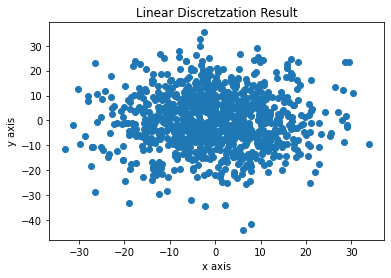

In [5]:
### Problem 2. Various Distribution
x, y = np.load('problem2.npy')

### Plot...
plt.clf()
plt.scatter(x,y)
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Linear Discretzation Result")
plt.show()



MSE of Uniform=8.37473727170697e-05


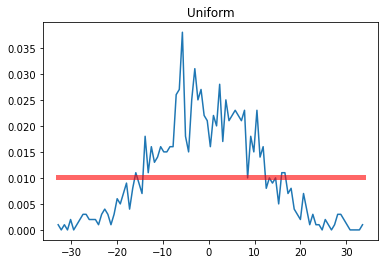

MSE of Gaussian=1.0822298190341525e-05


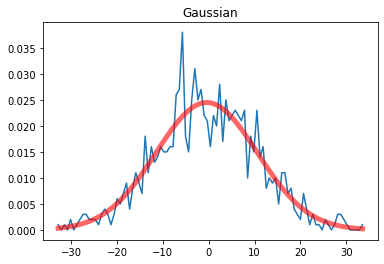

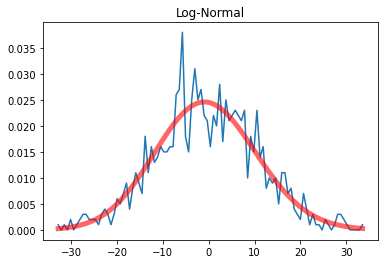

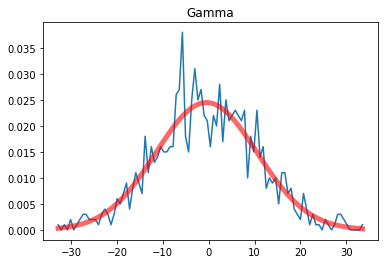

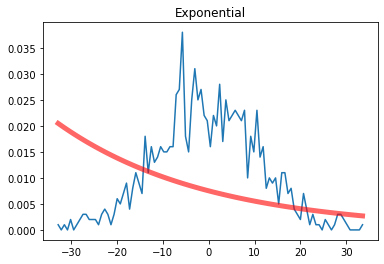

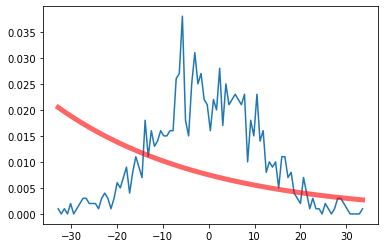

In [7]:
### Problem 2-A. Find the best distribution and its parameters for x position
#from scipy.stats import uniform as target_stat #Uniform distribution
#from scipy.stats import norm as target_stat #Gaussian distribution
#from scipy.stats import poisson as target_stat #Poisson distribution
#from scipy.stats import lognorm as target_stat #Log-Normal distribution
#from scipy.stats import gamma as target_stat #Gamma distribution
#from scipy.stats import expon as target_stat #Exponential distribution
x_edges = np.linspace(min(x), max(x), 100)
d_bins = (x_edges[1:] + x_edges[:-1])/2
freq,_ = np.histogram(x, bins=x_edges)
normalized_freq = freq / np.sum(freq)
####### BLANK #######

from scipy.stats import uniform as target_stat #Uniform distribution
loc, scale = target_stat.fit(x)
pdf = target_stat.pdf(d_bins, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])
mse = np.sum(np.square(normalized_freq - pdf)) / len(d_bins)
title = "Uniform"
print("MSE of " + title + "=" + str(mse))

plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title(title)
plt.show()


from scipy.stats import norm as target_stat #Gaussian distribution
loc, scale = target_stat.fit(x)
pdf = target_stat.pdf(d_bins, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])
mse = np.sum(np.square(normalized_freq - pdf)) / len(d_bins)
title = "Gaussian"
print("MSE of " + title + "=" + str(mse))

plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title(title)
plt.show()

from scipy.stats import lognorm as target_stat #Log-Normal distribution
shape, loc, scale = target_stat.fit(x)
pdf = target_stat.pdf(d_bins, s=shape, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])

plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Log-Normal")
plt.show()

from scipy.stats import gamma as target_stat #Gamma distribution
a, loc, scale = target_stat.fit(x)
pdf = target_stat.pdf(d_bins, a=a, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])

plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Gamma")
plt.show()

from scipy.stats import expon as target_stat #Exponential distribution
loc, scale = target_stat.fit(x)
pdf = target_stat.pdf(d_bins, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])

plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Exponential")
plt.show()



#####################
plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.show()





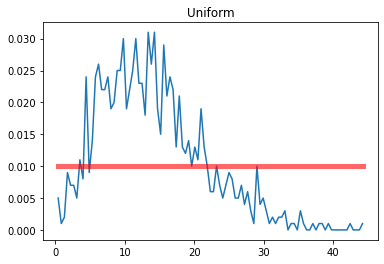

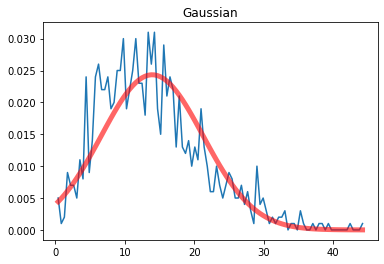

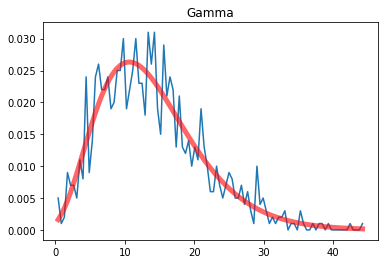

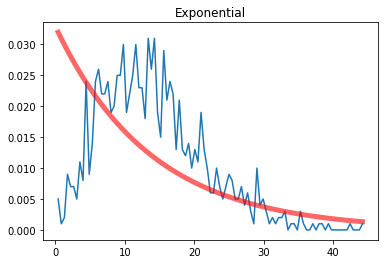

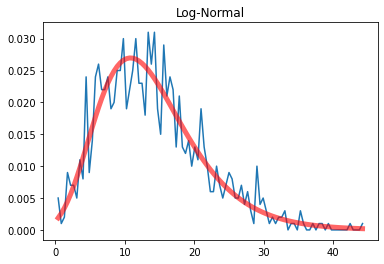

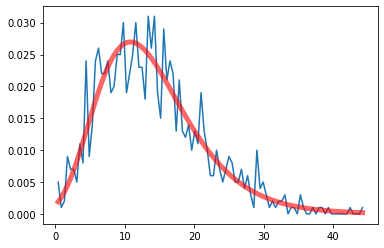

In [9]:
### Problem 2-B. Find the best distribution and its parameters
# for the longest distance of every 10 consecutive samples

#from scipy.stats import uniform as target_stat #Uniform distribution
#from scipy.stats import norm as target_stat #Gaussian distribution
#from scipy.stats import poisson as target_stat #Poisson distribution
#from scipy.stats import lognorm as target_stat #Log-Normal distribution
#from scipy.stats import gamma as target_stat #Gamma distribution
#from scipy.stats import expon as target_stat #Exponential distribution

####### BLANK #######
# Example. Replace All!
d = np.sqrt(x*x + y*y)

d_edges = np.linspace(min(d), max(d), 100)
d_bins = (d_edges[1:] + d_edges[:-1])/2
freq,_ = np.histogram(d, bins=d_edges)
normalized_freq = freq / np.sum(freq)






from scipy.stats import uniform as target_stat #Uniform distribution
loc, scale = target_stat.fit(d)
pdf = target_stat.pdf(d_bins, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])
plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Uniform")
plt.show()


from scipy.stats import norm as target_stat #Gaussian distribution
loc, scale = target_stat.fit(d)
pdf = target_stat.pdf(d_bins, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])
plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Gaussian")
plt.show()


from scipy.stats import gamma as target_stat #Gamma distribution
a, loc, scale = target_stat.fit(d)
pdf = target_stat.pdf(d_bins, a=a, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])
plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Gamma")
plt.show()

from scipy.stats import expon as target_stat #Exponential distribution
loc, scale = target_stat.fit(d)
pdf = target_stat.pdf(d_bins, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])
plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Exponential")
plt.show()

from scipy.stats import lognorm as target_stat #Log-Normal distribution
shape, loc, scale = target_stat.fit(d)
pdf = target_stat.pdf(d_bins, s=shape, loc=loc, scale=scale) # Example. Remove it!
pdf = pdf * (d_bins[1]-d_bins[0])
plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.title("Log-Normal")
plt.show()

#####################

plt.clf()
plt.plot(d_bins, normalized_freq)
plt.plot(d_bins, pdf, 'r-', lw=5, alpha=0.6)
plt.show()


